In [85]:
import numpy as np
from sympy import init_session
# from IPython.display import display_latex as display
from sympy import symbols
from sympy import exp
from sympy.matrices import Matrix
from scipy import linalg
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import seaborn as sb

%matplotlib widget
# %matplotlib notebook
sb.set_theme("notebook", style="darkgrid")
init_session() # importing lots of sympy methods for use in algebraical calculations

IPython console for SymPy 1.13.3 (Python 3.11.11-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.13.3/



# Exercise from Ch. 2

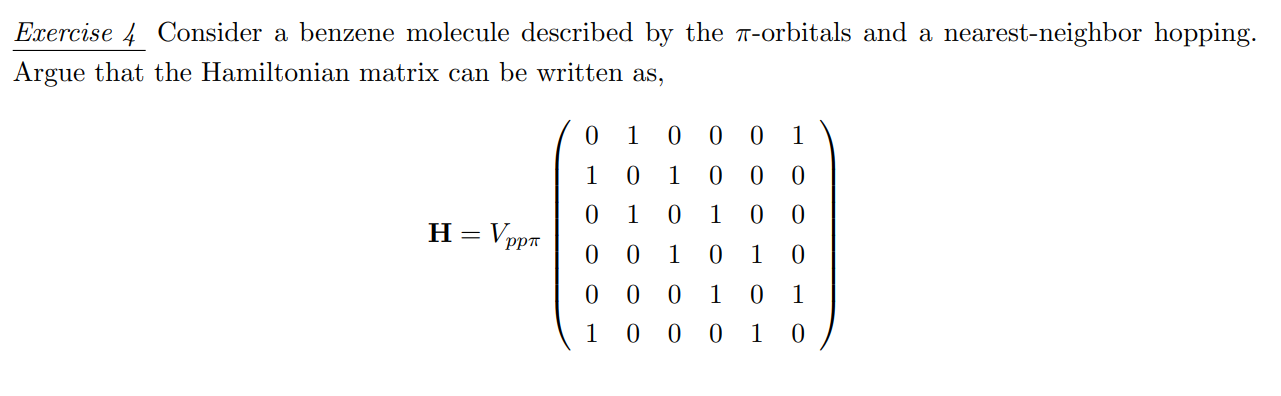

First we note the configuration as drawn here:  
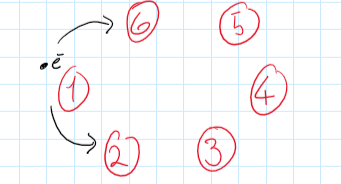

Let the initial state be denoted as $\ket{i} = \ket{1} = \begin{pmatrix} 1 & 0 & 0 & 0 & 0 & 0 \end{pmatrix}^T$, corresponding to a free elctron sitting on atom of index $1$.  
The we have:
$$
    \hat{H}\ket{i} = V_{pp\pi}\begin{pmatrix}
        0 & 1 & 0 & 0 & 0 & 1 \\
        1 & 0 & 1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 1 & 0 & 0 \\
        0 & 0 & 1 & 0 & 1 & 0 \\
        0 & 0 & 0 & 1 & 0 & 1 \\
        1 & 0 & 0 & 0 & 1 & 0 \\
    \end{pmatrix} \ket{i} = V_{pp\pi}\left(\ket{2} + \ket{6}\right)
$$
with the normalization constraint: $|V_{pp\pi}|^2 = \frac12$. Since the Hamiltonian is hermitian, then the amplitude coefficient must be real valued, and therefore $V_{pp\pi} = \frac{1}{\sqrt{2}}$

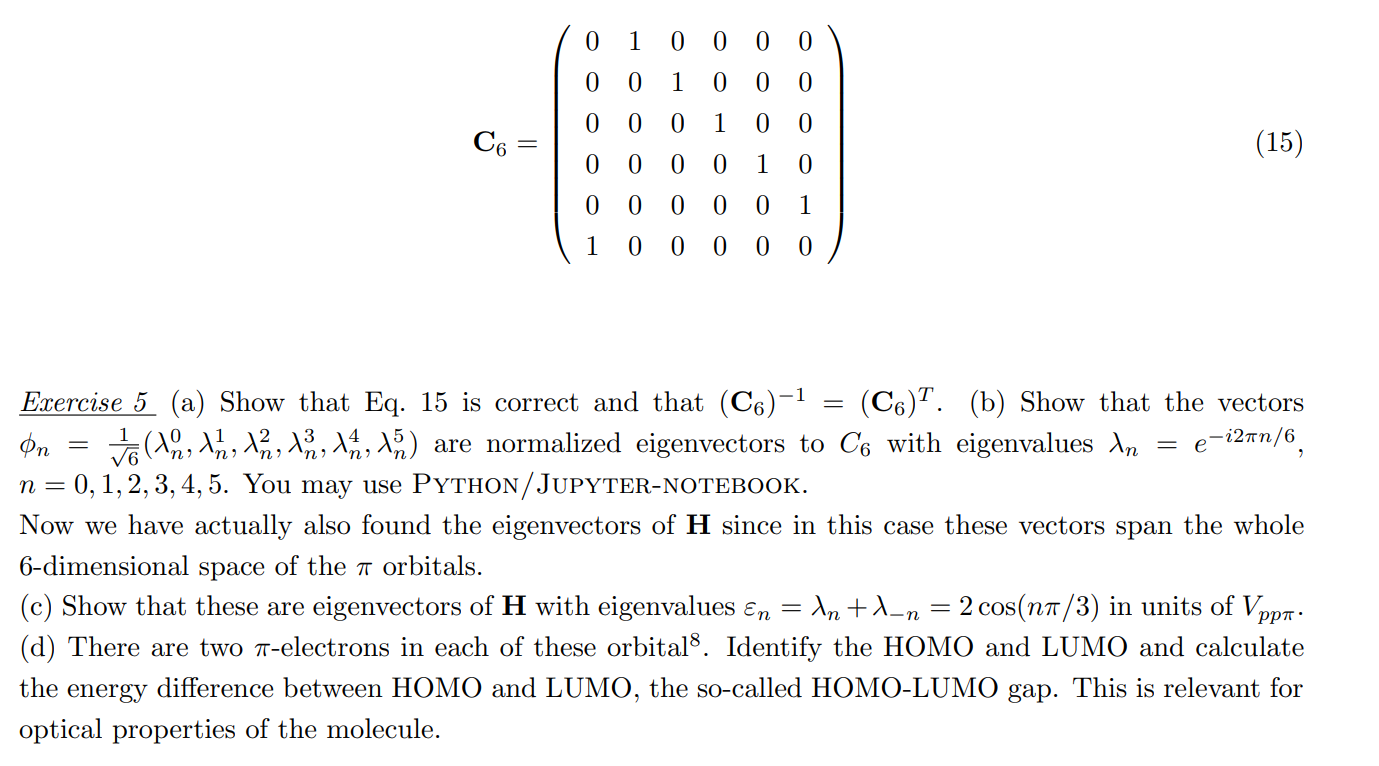

## a)

We have the relation that: $C_6\begin{pmatrix} c_1 & c_2 & c_3 & c_4 & c_5 & c_6 \end{pmatrix}^T = \begin{pmatrix} c_2 & c_3 & c_4 & c_5 & c_6 & c_1 \end{pmatrix}^T$.

We can confirm that this is how the matrix operators by using an example

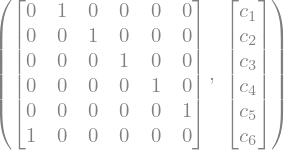

In [86]:
c1, c2, c3, c4, c5, c6, V = symbols("c_1 c_2 c_3 c_4 c_5 c_6 V_{pp\pi}")

mat = np.zeros((6,6), int)
np.fill_diagonal(mat[:, 1:], 1)
# mat = np.arange(int(6*6)).reshape(6,6)
mat[5, 0]  = 1
# print(mat)
v = Matrix([c1,c2,c3,c4,c5,c6])
C = Matrix(mat)
C, v

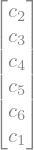

In [87]:
C@v

As expected.

In [88]:
# Check to see if its inverse is equal to its transposed 
C.inv() == C.T

True

## b)

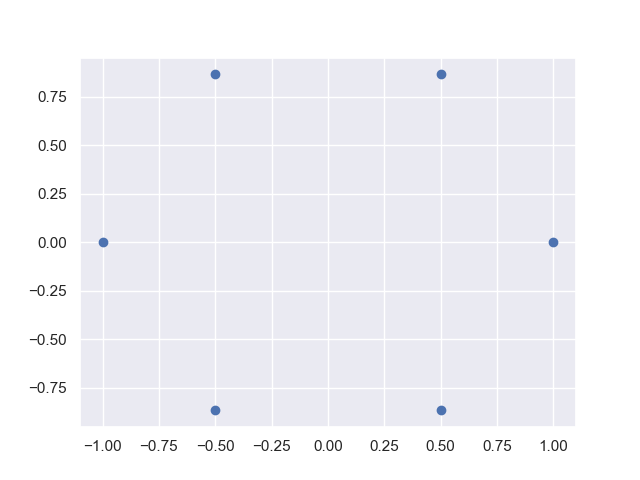

In [89]:
es, vs = np.linalg.eig(np.array(C, dtype=np.float64))
# lam = lambda x: np.exp(-1j*np.pi*x/3, )
# index = [5, 4, 2, 0, 1, 3]
# for n, (es, vs) in enumerate(zip(es[index], vs.T)):
#     lam_n = lam(n)
#     v_n = 1/np.sqrt(6)* lam_n ** np.arange(6)
#     print(f"Eigenvalues: {es:>11.2f}")
#     print(f"expected:    {lam_n:>11.2f}")
#     print()
#     print("Vectors:")
#     with np.printoptions(precision=3, linewidth=110):
#         print(vs)
#         print("expected:")
#         print(v_n)
#         print()
        # print()
        
fig, ax = plt.subplots()

ax.scatter(es.real, es.imag);

## c)

In [90]:
H = np.zeros((6,6))
np.fill_diagonal(H[1:, :], 1)
np.fill_diagonal(H[:, 1:], 1)

H[[0,5], [5,0]] = 1

print(H.astype(int))
print()

Hes, Hvs = np.linalg.eigh(H)

with np.printoptions(suppress=True, formatter={"all": lambda x: f" {x:>12.2f}"}, linewidth=110):
    # for e, v in zip(es, ev.T):
    #     print()
    #     print(v)
    
    # print(np.array([2*np.cos(n*np.pi/3) for n in range(6) ])[[3, 4, 2, 1, 5, 0]])
    # print("index\n", np.arange(6).astype(int))
    index = [0,1,2,3,4,5]
    print("###\t Eigval")
    print("Hamiltonian")
    print(Hes)
    print("C6")
    print(es[index])
    
    print("###\t Eigvec")
    print("Hamiltonian")
    print(Hvs.astype(complex))
    print("C6")
    print(vs[index])
    
    
    # VS = vs.copy()
    # VS[:, 1] = vs[:, 1] - vs[:, 5]
    # print("Linear combinations")
    # print(VS[index])
    
 

[[0 1 0 0 0 1]
 [1 0 1 0 0 0]
 [0 1 0 1 0 0]
 [0 0 1 0 1 0]
 [0 0 0 1 0 1]
 [1 0 0 0 1 0]]

###	 Eigval
Hamiltonian
[        -2.00         -1.00         -1.00          1.00          1.00          2.00]
C6
[  -1.00+0.00j   -0.50+0.87j   -0.50-0.87j    0.50+0.87j    0.50-0.87j    1.00+0.00j]
###	 Eigvec
Hamiltonian
[[   0.41+0.00j   -0.00+0.00j    0.58+0.00j    0.05+0.00j   -0.58+0.00j   -0.41+0.00j]
 [  -0.41+0.00j   -0.50+0.00j   -0.29+0.00j   -0.48+0.00j   -0.33+0.00j   -0.41+0.00j]
 [   0.41+0.00j    0.50+0.00j   -0.29+0.00j   -0.52+0.00j    0.25+0.00j   -0.41+0.00j]
 [  -0.41+0.00j   -0.00+0.00j    0.58+0.00j   -0.05+0.00j    0.58+0.00j   -0.41+0.00j]
 [   0.41+0.00j   -0.50+0.00j   -0.29+0.00j    0.48+0.00j    0.33+0.00j   -0.41+0.00j]
 [  -0.41+0.00j    0.50+0.00j   -0.29+0.00j    0.52+0.00j   -0.25+0.00j   -0.41+0.00j]]
C6
[[   0.41+0.00j    0.41+0.00j    0.41-0.00j   -0.20-0.35j   -0.20+0.35j   -0.41+0.00j]
 [  -0.41+0.00j   -0.20+0.35j   -0.20-0.35j    0.20-0.35j    0.20+0.35j 

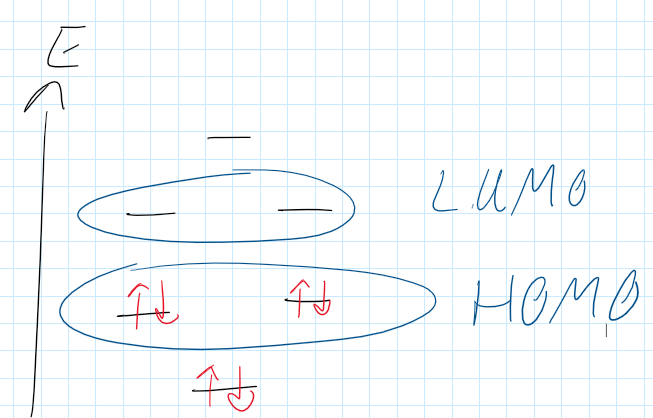

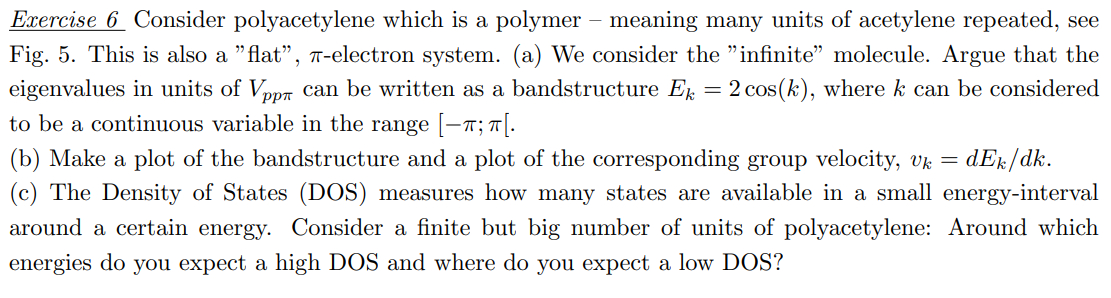

## a)

We are told that the energy is $E_m=2\cos{(n\pi/m)}$ for $m$ carbon and hydrogen atoms in the <u>*system*</u>

If we have polyacetylene (a polymer) we can consider $m\gg 1$ and therefore the argument for the cosine is incremented so little by increasing $n$, that we may approximate it (the argument) as continuous variable called $k$ on the interval $[-\pi,\pi[$.

## b)

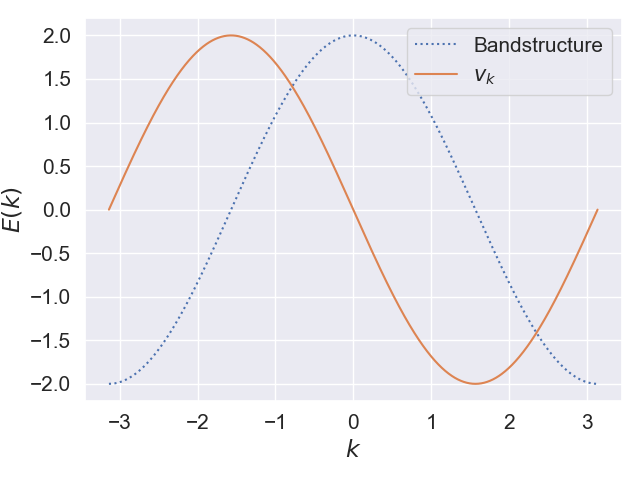

In [91]:
tick_labelsize = 15
labelsize = 17
for key in ["xtick.labelsize", "ytick.labelsize"]:
    plt.rcParams[key] = tick_labelsize
plt.rcParams["legend.fontsize"] = tick_labelsize
plt.rcParams["axes.labelsize"] = labelsize

def plot_bandstructure(k_vec):
    bandstruct = lambda x: 2*np.cos(x)
    fig, ax = plt.subplots()
    ax.plot(k_vec, bandstruct(k_vec), label="Bandstructure", linestyle=":")
    return fig, ax


ks = np.linspace(-np.pi, np.pi, num=1001)
fig, ax = plot_bandstructure(ks)



group_vel = lambda x: -2*np.sin(x)
ax.plot(ks, group_vel(ks), label=r"$v_k$")
ax.set_xlabel("$k$")
ax.set_ylabel("$E(k)$")
ax.legend()
fig.tight_layout()

## c)

C:\Users\basti\AppData\Local\Temp\ipykernel_26028\49647449.py:1: RuntimeWarning: divide by zero encountered in divide
  DOS = lambda x: 1 / (np.pi * np.abs(group_vel(x))) # 1/pi * 1/(hbar* v_k)


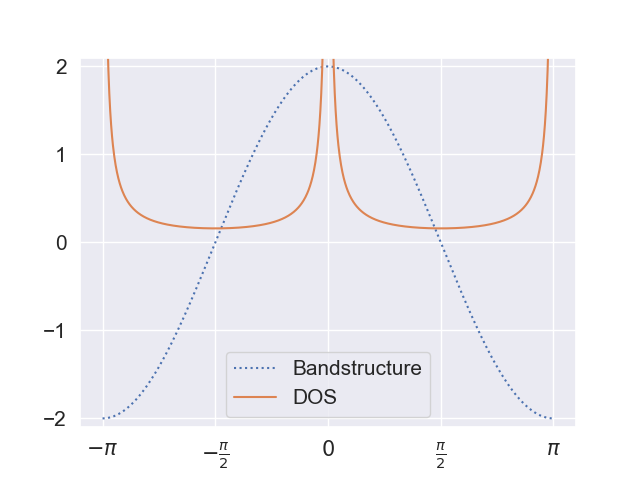

In [92]:
DOS = lambda x: 1 / (np.pi * np.abs(group_vel(x))) # 1/pi * 1/(hbar* v_k)
OFFSET = 0.1
# k1 = np.linspace(-np.pi+OFFSET, 0-OFFSET, num=100)
# k2 = np.linspace(0+OFFSET, np.pi-OFFSET, num=100)

fig, ax = plot_bandstructure(ks)


ticks = [2,1,0,-1,-2]

ax.plot(ks, DOS(ks), label="DOS")
ax.legend()

ax.set_ylim(-2 - OFFSET, 2 + OFFSET);
ax.set_xticks([-np.pi, -np.pi/2, 0,  np.pi/2, np.pi])
ax.set_xticklabels([r"$-\pi$", r"$-\frac{\pi}{2}$", "$0$", r"$\frac{\pi}{2}$", r"$\pi$"])
ax.legend();

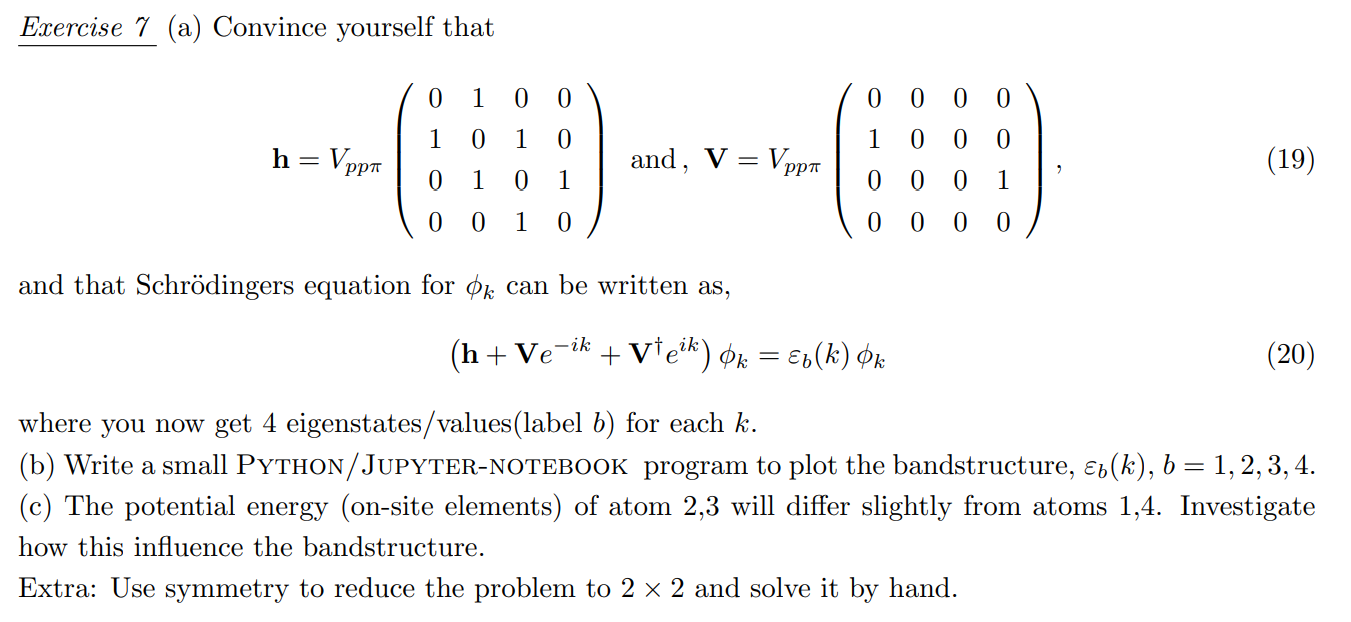

##  b)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

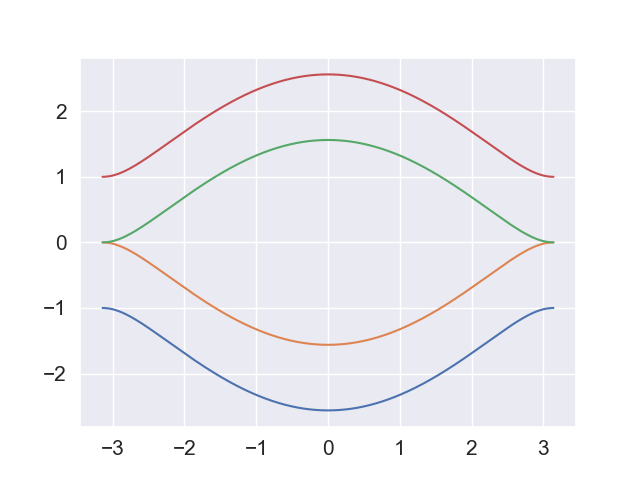

In [98]:
h = np.diag(np.ones(3), -1) + np.diag(np.ones(3), 1) # create the on-site matrix
V = np.zeros((4,4)) # initilize the hopping matrix being all zero
V[[1,2], [0,3]] = 1 # sets elements V[1,0] and V[2,3] to 1

class PlotBand:
    def __init__(self, h, V, k_num=1001, epsilon=0, perb=None):
        '''
            Plot the band structure.
            
            Parameters
            ----
            h : on-site matrix
            V : Hopping matrix
            k_num : Number of (equidistant) values for the crystal momentum, `k`.
            epsilon : Paramter determining 1/2 of the realtive difference of potential between atoms 2,3 and 1,4. 
                (2, 3) are scaled by epsilon, and (1,4) are scaled by `-epsilon`.
        '''
        self.perb = perb
        self.h_unperturbated = h # size (N, N)
        self.V = V # size (N, N)
        self.epsilon = epsilon # initial perturbation
        self.h = self.perturbation() # size (N, N) 
        self.ks = np.linspace(-np.pi, np.pi, num=k_num)
        self.set_hamiltonian() # Construct Hamiltonian and comute its eigenvalues.
        
        
    def perturbation(self):
        perb = self.perb
        if perb is None:
            perb = np.diag([-1,1,1,-1])
        return self.h_unperturbated + perb*self.epsilon
    
    
    def set_hamiltonian(self):
        # Create dimensions so broadcasting is possible
        ks = self.ks.copy()[:, None, None] # size (k_num, 1, 1)
        h = self.perturbation()[None, :, :] # size (1, N, N)
        V = self.V.copy()[None, :, :] # size (1, N, N)
        VT = self.V.transpose().copy()[None, :, :] # size (1, N, N)
        self.hamiltonian = h + V*np.exp(-1j*ks) + VT*np.exp(1j*ks) # size (k_num, N, N)
        self.eigs = np.linalg.eigvalsh(self.hamiltonian)
    
    def get_hamiltonian(self):
        return self.hamiltonian
    
    def plot(self):
        fig, ax = plt.subplots()
        ax.plot(self.ks, self.eigs)
        return fig, ax
    
    def plot_interactive(self, perb_range=(-5, 10, 1), **kwargs):
        eps_min, eps_max, eps_step = perb_range
        
        YLIM = kwargs.get("ylim", (None, None))
        fig, ax = plt.subplots()
        plt.subplots_adjust(bottom=0.25)  # Adjust space for the slider
        
        bands = ax.plot(self.ks, self.eigs, lw=2)
        
        def set_lims(ax, ylim):
            ax.set_ylim(bottom=ylim[0], top=ylim[1])
            
        set_lims(ax, YLIM)
        ax.set_title("Bandstructure with adjustable perturbation.")
        ax.set_xlabel(r"$k$")
        ax.set_ylabel(r"$E(k)$")
        ax_slider = plt.axes([0.25, 0.1, 0.65, 0.03])  # [left, bottom, width, height]
        
        slider = Slider(ax_slider, r"$\epsilon$", eps_min, eps_max, valinit=self.epsilon, valstep=eps_step)
        
        def update(val):
            ax.clear()
            self.epsilon = slider.val # Get the current slider value
            self.set_hamiltonian()
            # print(self.eps)
            ax.plot(self.ks, self.eigs, lw=2)
            set_lims(ax, YLIM)
            # for i, E_band in enumerate(bands):
            #     ax.plot(self.ks, self.eigs[:, i]) # Update the y-data of the plot
            fig.canvas.draw_idle() # Redraw the plot
        
        slider.on_changed(update)
        
        plt.show()
        
        # return fig, ax
band = PlotBand(h, V, 
                # perb=np.array([0,1,1,0])
                )
band.plot()

## c)

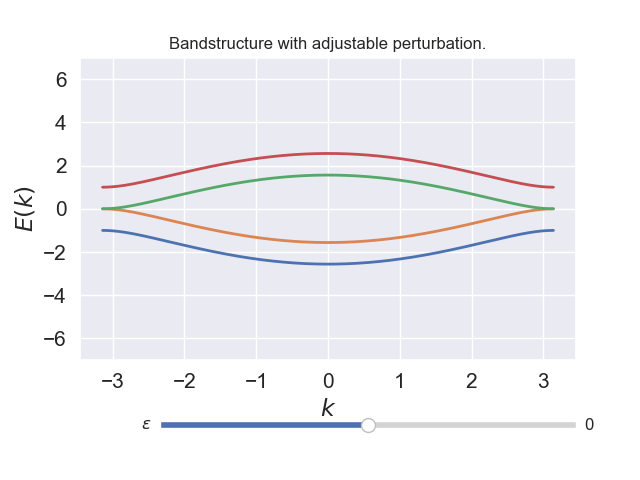

In [100]:
band.plot_interactive(
    perb_range=(-3, 3, 0.1),
    ylim=(-7, 7)
                      )

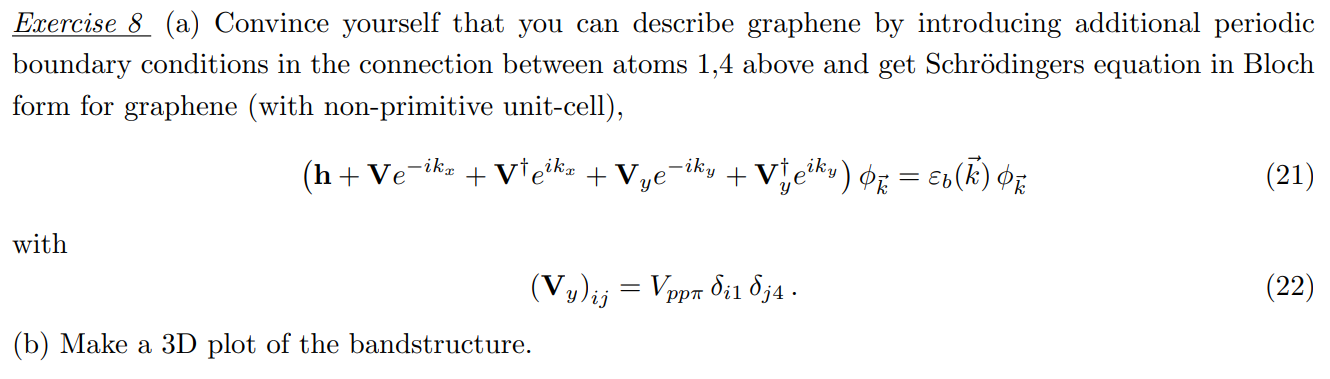

In [95]:
class PlotBand2D:
    def __init__(self, h, V, eps_init=0):
        
        self.h_unperturbed = h
        self.V = V
        self.VT = V.transpose()
        self.eps_init = eps_init
        
        
        
    